# Appendix A

## Import

In [199]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [200]:
#import data
df=pd.read_csv('CaseStudyDatasetQ.csv')

## Inspect and Explore Data

In [201]:
#summary statistics
df.describe()

,Counts,distance,weight,age,carage,exposure
count,611000.000000,611000.000000,611000.000000,611000.000000,611000.000000,611000.000000
mean,0.060939,14.848643,1464.489406,47.252457,7.762165,0.899886
std,0.247075,14.462616,667.178791,16.052246,6.887672,0.057723
min,0.000000,1.000000,450.000000,18.000000,1.000000,0.800000
25%,0.000000,5.000000,962.000000,35.000000,3.000000,0.850004
50%,0.000000,10.000000,1319.000000,46.000000,5.000000,0.899947
75%,0.000000,19.000000,1826.000000,58.000000,10.000000,0.949785
max,3.000000,95.000000,3994.000000,98.000000,45.000000,1.000000


In [202]:
#dataframe summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611000 entries, 0 to 610999
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Counts    611000 non-null  int64  
 1   gender    611000 non-null  object 
 2   distance  611000 non-null  int64  
 3   weight    611000 non-null  int64  
 4   age       611000 non-null  int64  
 5   carage    611000 non-null  int64  
 6   exposure  611000 non-null  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 32.6+ MB


In [203]:
#checking for nulls
df.isnull().sum()

Counts      0
gender      0
distance    0
weight      0
age         0
carage      0
exposure    0
dtype: int64

In [204]:
#checking for duplicate rows
any(df.duplicated())

False

In [205]:
#inspect number of Unique values in each column
df.nunique()

Counts           4
gender           2
distance        95
weight        3523
age             81
carage          45
exposure    610100
dtype: int64

array([[<AxesSubplot:title={'center':'Counts'}>,
        <AxesSubplot:title={'center':'distance'}>],
       [<AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'carage'}>,
        <AxesSubplot:title={'center':'exposure'}>]], dtype=object)

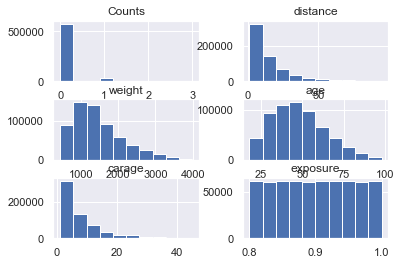

In [206]:
#check distribution of each column
df.hist()

From visual inspection, exposure seems to be uniformly distributed while others seem to have a Poisson's distribution with age and weight having relatively higher lambdas.

## Feature Engineering

In [207]:
#create quadratic features
df['dist2']=df['distance']*df['distance']
df['wt2']=df['weight']*df['weight']
df['age2']=df['age']*df['age']
df['cage2']=df['carage']*df['carage']

In [208]:
#create interaction features
df['dist_wt']=df['distance']*df['weight']
df['dist_age']=df['distance']*df['age']
df['dist_cage']=df['distance']*df['carage']
df['wt_age']=df['weight']*df['age']
df['wt_cage']=df['weight']*df['carage']
df['age_cage']=df['age']*df['carage']

In [209]:
#create target variable - Claim Frequency
df['cfreq']=df['Counts']/df['exposure']

In [210]:
#manually encoding the categorical feature - gender
df['gender']=df['gender'].replace('female',0).replace('male',1)

In [211]:
#split into features, target, weights, and counts
X=df.drop(columns=['Counts','exposure','cfreq'])
y=df['cfreq']
weights=df['exposure']
counts=df['Counts']

In [244]:
#inspect the correlation matrix
corr = df.corr()
corr

,Counts,gender,distance,weight,age,carage,exposure,dist2,wt2,age2,cage2,dist_wt,dist_age,dist_cage,wt_age,wt_cage,age_cage,cfreq
Counts,1.000000,-0.020664,0.014776,0.033139,-0.034445,0.040784,0.016357,0.015082,0.032918,-0.031048,0.038873,0.025287,0.001617,0.033300,0.004574,0.048638,0.022728,0.997806
gender,-0.020664,1.000000,0.001858,0.002369,0.000723,-0.000814,-0.002765,0.002020,0.002819,0.000287,-0.000559,0.002690,0.002019,0.000850,0.002113,0.000202,-0.000768,-0.020606
distance,0.014776,0.001858,1.000000,-0.001653,-0.002236,0.000049,-0.000844,0.933128,-0.001336,-0.002212,0.000494,0.837198,0.898842,0.618112,-0.002601,-0.000725,-0.000510,0.014901
weight,0.033139,0.002369,-0.001653,1.000000,-0.002112,0.001519,-0.000192,-0.001284,0.972857,-0.001710,0.001251,0.390838,-0.002185,-0.000263,0.772399,0.424411,0.000754,0.033090
age,-0.034445,0.000723,-0.002236,-0.002112,1.000000,0.000788,0.000767,-0.001813,-0.002377,0.982654,-0.000048,-0.002746,0.311693,-0.000559,0.576335,-0.000094,0.341928,-0.034478
carage,0.040784,-0.000814,0.000049,0.001519,0.000788,1.000000,0.002580,0.000438,0.001446,0.000869,0.940380,0.000570,0.000503,0.563371,0.001737,0.824697,0.890161,0.040546
exposure,0.016357,-0.002765,-0.000844,-0.000192,0.000767,0.002580,1.000000,-0.000951,-0.000640,0.000690,0.001382,-0.000646,0.000056,0.000827,0.000972,0.001416,0.001902,0.000539
dist2,0.015082,0.002020,0.933128,-0.001284,-0.001813,0.000438,-0.000951,1.000000,-0.001238,-0.001696,0.000577,0.781089,0.838869,0.576841,-0.002059,-0.000180,0.000141,0.015244
wt2,0.032918,0.002819,-0.001336,0.972857,-0.002377,0.001446,-0.000640,-0.001238,1.000000,-0.001948,0.001160,0.380414,-0.001960,-0.000064,0.750947,0.413405,0.000567,0.032922
age2,-0.031048,0.000287,-0.002212,-0.001710,0.982654,0.000869,0.000690,-0.001696,-0.001948,1.000000,-0.000091,-0.002523,0.306149,-0.000361,0.566547,0.000101,0.336132,-0.031090


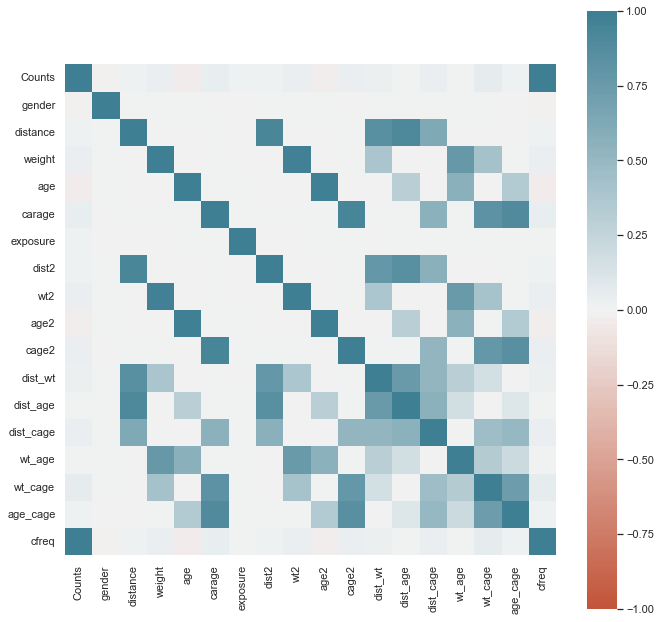

In [245]:
#plot heatmat of correlation matrix for visual inspection
fig, ax = plt.subplots()
fig.set_size_inches(11,11)

sns.heatmap(corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)
plt.show()

In [246]:
#inspecting correlations of all features (and count and exposure) with the target (cf)
df.corr()['cfreq']

Counts       0.997806
gender      -0.020606
distance     0.014901
weight       0.033090
age         -0.034478
carage       0.040546
exposure     0.000539
dist2        0.015244
wt2          0.032922
age2        -0.031090
cage2        0.038657
dist_wt      0.025407
dist_age     0.001716
dist_cage    0.033367
wt_age       0.004475
wt_cage      0.048410
age_cage     0.022556
cfreq        1.000000
Name: cfreq, dtype: float64

The correlations between the features and target variables are pretty weak. Therefore, testing any Hypotheses wouldn't be very helpful since any relationship, even if found to be statistically significant, would have a small effect size.

In [247]:
#identifying pairs of highly correlated features for demonstration
corrmat = X.corr()
corrmat = corrmat.abs().unstack() # absolute value of corr coef
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat >= 0.8]
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']
corrmat

,feature1,feature2,corr
0,age2,age,0.982654
1,age,age2,0.982654
2,weight,wt2,0.972857
3,wt2,weight,0.972857
4,carage,cage2,0.940380
5,cage2,carage,0.940380
6,dist2,distance,0.933128
7,distance,dist2,0.933128
8,distance,dist_age,0.898842
9,dist_age,distance,0.898842


**We will bypass feature selection and retain all the features because:**
1. Decision Trees are by nature immune to multicollinearity and will select the important features.
2. We are interested in predictions, not in causality.
3. Our model contains relatively small number of features anyway (ie. narrow dataset). So reducing processing time is not a priority.

However, if we wanted to reduce processing time, we could use an ensemble tree method (RandomForest) to get feature_importances_ and exclude the features with importances below a certain threshold. 

I will add the code for this process below **merely for demonstration.**

from sklearn.ensemble import RandomForestRegressor
feat_sel_model = RandomForestRegressor(criterion='poisson',n_estimators=10, random_state=10)

feat_sel_model.fit(X,y, sample_weight=weights)

feat_sel_model.feature_importances_

importances=pd.DataFrame(X.columns)
importances['importances']= feat_sel_model.feature_importances_
importances

selected_features=importances[importances['importances']>feat_sel_model.feature_importances_.mean()]
selected_features

selected_features gives the features which have importance scores higher than the mean importance score. One could choose to keep these features and drop the rest for an aggressively fast model.

## Modelling

We will try 3 models (Decision Tree and two Gradient Boosted Models). We will use GridSearchCV to get the best hyperparameters compared through 10-fold Cross Validation.

**In other words, we will use 10-fold Cross Validation to find the best version of each model and then test the model on the test data in a single fold.**

### Split data into test, train and weights

In [256]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, weights_train, weights_test = train_test_split(X, y, weights, test_size = 0.2, random_state = 1)

### Decision Tree Regressor

In [261]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import make_scorer 
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score

To manage the bias-variance trade-off (ie. to avoid overfitting and underfitting), we will try a few different tree sizes with 10-fold Cross Validation to find the best parameters

In [287]:
#parameters to try
param_grid = {"max_depth": [2,3,5,8,10]}

In [288]:
#create instance
gcv_dec_tree = GridSearchCV(DecisionTreeRegressor(criterion='poisson',random_state=0),
              param_grid, cv=10)

In [289]:
#fit model to data
gcv_dec_tree.fit(X_train, y_train, sample_weight=weights_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeRegressor(criterion='poisson',
                                             random_state=0),
             param_grid={'max_depth': [2, 3, 5, 8, 10]})

In [295]:
#see the best parameters
gcv_dec_tree.best_params_

{'max_depth': 3}

In [299]:
#predict test data
dec_tree_pred=gcv_dec_tree.predict(X_test)

In [321]:
#check model performance on test data
from sklearn.metrics import mean_squared_error
import math

dec_tree_mse = mean_squared_error(y_test, dec_tree_pred,sample_weight=weights_test)
dec_tree_rmse = math.sqrt(dec_tree_mse)

print("Decision Tree MSE:", dec_tree_mse)
print("Decision Tree RMSE:", dec_tree_rmse)

Decision Tree MSE: 0.07315265274227589
Decision Tree RMSE: 0.2704674707654802


### SkLearn's HistGradientBoostingRegressor

In [304]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

In [322]:
#parameters to try
param_grid2 = {"max_depth": [2,3,5],
             "learning_rate": [0.1,0.2]}

In [310]:
#create instance
gcv_GBR = GridSearchCV(HistGradientBoostingRegressor(loss='poisson'), param_grid2, cv=10)

In [315]:
#fit model to data
gcv_GBR.fit(X_train, y_train, sample_weight=weights_train)

GridSearchCV(cv=10, estimator=HistGradientBoostingRegressor(loss='poisson'),
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [2, 3, 5, 8, 10]})

In [316]:
#see the best parameters
gcv_GBR.best_params_

{'learning_rate': 0.1, 'max_depth': 2}

In [318]:
#predict test data
GBR_pred=gcv_GBR.predict(X_test)

In [320]:
#check model performance on test data

GBR_mse = mean_squared_error(y_test, GBR_pred, sample_weight=weights_test)
GBR_rmse = math.sqrt(GBR_mse)

print("Gradient Boosting Regressor MSE:", GBR_mse)
print("Gradient Boosting Regressor RMSE:", GBR_rmse)

Gradient Boosting Regressor MSE: 0.0727673038305982
Gradient Boosting Regressor RMSE: 0.26975415442694894


The Gradient Boosting Regressor performs slightly better than the simple Decision Tree model.

### XGBoost's sklearn wrapper interface XGBRegressor

In [328]:
import xgboost as xgb

In [329]:
#parameters to try
param_grid3={'n_estimators':[10,50,100] ,'max_depth':[2,3,5]}

In [330]:
#create instance
gcv_xgb = GridSearchCV(xgb.XGBRegressor(objective= "count:poisson", learning_rate=0.1), param_grid3, cv=10)

In [331]:
#fit model to data
gcv_xgb.fit(X_train, y_train, sample_weight=weights_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.1, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None,
                                    objective='count:poisson', predictor=None,
                                    random_state=None, reg_alpha=None,
                    

In [332]:
#see the best parameters
gcv_xgb.best_params_

{'max_depth': 3, 'n_estimators': 100}

In [333]:
#predict test data
xgb_pred=gcv_xgb.predict(X_test)

In [334]:
#check model performance on test data

xgb_mse = mean_squared_error(y_test, xgb_pred, sample_weight=weights_test)
xgb_rmse = math.sqrt(xgb_mse)

print("XGBoost Regressor MSE:", xgb_mse)
print("XGBoost Regressor RMSE:", xgb_rmse)

XGBoost Regressor MSE: 0.07280785563727263
XGBoost Regressor RMSE: 0.2698293083363492


The XGBoost implementation of the Gradient Boosted Regressor performs similarly to sklearn's implementation.

### Reasonableness Check

Check if the Sum of Counts of the test data is reasonably close to the Sum of Counts obtained from the Predicted Claim Frequency of the test data.

In [342]:
#find the sum of Counts of the test data
counts_test=y_test*weights_test
counts_test.sum()

7237.0

In [341]:
#find the predicted sum of Counts of the test data
counts_test_pred=xgb_pred*weights_test
counts_test_pred.sum()

7813.289965129051

### Feature Importances

In [345]:
#create an instance of XGBRegressor Class with the best parameters found in the GridSearchCV above
xgb = xgb.XGBRegressor(objective= "count:poisson", learning_rate=0.1, max_depth = 3, n_estimators=100)

In [347]:
#fit model to data
xgb.fit(X_train,y_train,sample_weight=weights_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1,
             max_delta_step=0.699999988, max_depth=3, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, objective='count:poisson', predictor='auto',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [350]:
#create a dataframe with the feature importances
feat_imp=pd.DataFrame(X.columns)
feat_imp['importances']= xgb.feature_importances_
feat_imp

,0,importances
0,gender,0.096303
1,distance,0.055645
2,weight,0.109485
3,age,0.157438
4,carage,0.074500
5,dist2,0.000000
6,wt2,0.000000
7,age2,0.000000
8,cage2,0.000000
9,dist_wt,0.086788


In [352]:
#retain only those features with importance greater than the mean feature importance
imp_feats=feat_imp[feat_imp['importances']>xgb.feature_importances_.mean()]
imp_feats.transpose()

,0,2,3,4,9,11,13
0,gender,weight,age,carage,dist_wt,dist_cage,wt_cage
importances,0.096303,0.109485,0.157438,0.0745,0.086788,0.08831,0.211726
